In [1]:
# example of a cnn for image classification
import cv2
import tensorflow as tf
from numpy import asarray
from numpy import unique
from numpy import argmax
from matplotlib import pyplot
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [2]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# summarize loaded dataset
print("Train: train_images.shape = %s, train_labels.shape = %s" % (train_images.shape, train_labels.shape))
print("Test: test_images.shape = %s, test_labels.shape = %s" % (test_images.shape, test_labels.shape))

4422102/4422102 [==============================] - 0s 0us/step
Train: train_images.shape = (60000, 28, 28), train_labels.shape = (60000,)
Test: test_images.shape = (10000, 28, 28), test_labels.shape = (10000,)


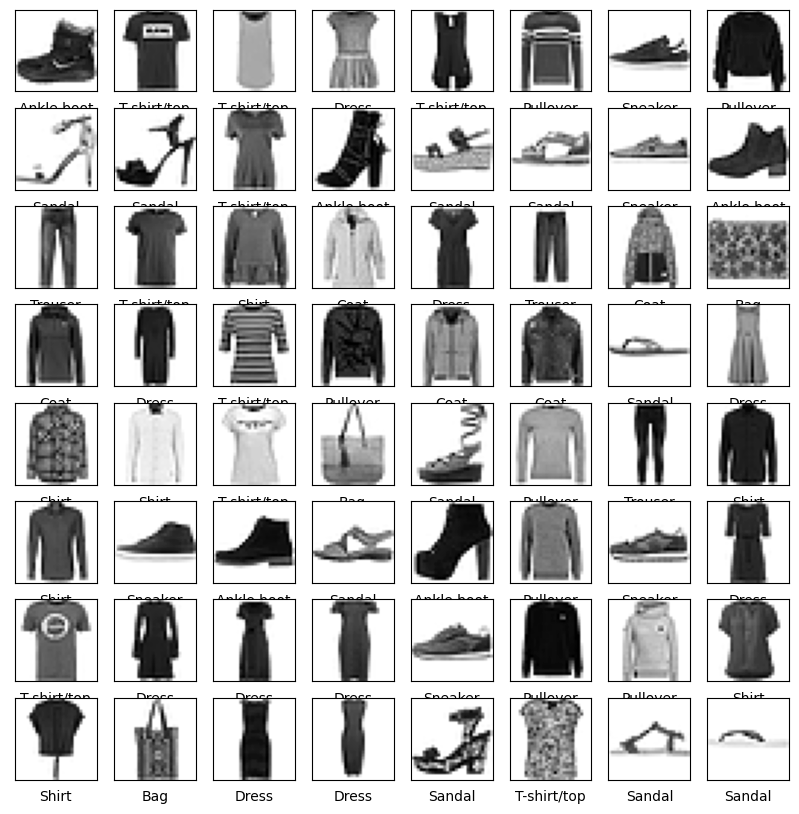

In [3]:
# plot first few images
pyplot.figure(figsize=(10,10))
for i in range(64):
  # define subplot
  pyplot.subplot(8, 8, i+1)
  pyplot.xticks([])
  pyplot.yticks([])
  pyplot.grid(False)
  # plot raw pixel data
  pyplot.imshow(train_images[i], cmap=pyplot.cm.binary)
  pyplot.xlabel(class_names[train_labels[i]])
# show the figure
pyplot.show()

In [4]:
# reshape data to have a single channel
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))
# determine the shape of the input images
in_shape = train_images.shape[1:]
# determine the number of classes
n_classes = len(unique(train_labels))
print('After reshape, train_images.shape = %s, test_images.shape = %s' %(train_images.shape, test_images.shape))
print('in_shape = %s, n_classes = %s' %(in_shape, n_classes))
# normalize pixel values
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

After reshape, train_images.shape = (60000, 28, 28, 1), test_images.shape = (10000, 28, 28, 1)
in_shape = (28, 28, 1), n_classes = 10


In [6]:
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [7]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(train_images, train_labels, epochs=10, batch_size=256, verbose=1)

Epoch 1/10


2022-09-23 18:50:21.178815: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-09-23 18:50:21.868609: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22151168 exceeds 10% of free system memory.
2022-09-23 18:50:22.046802: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.


  1/235 [..............................] - ETA: 3:00 - loss: 2.4557 - accuracy: 0.1094

2022-09-23 18:50:22.098185: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.
2022-09-23 18:50:22.135580: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 11075584 exceeds 10% of free system memory.


235/235 [==============================] - 56s 235ms/step - loss: 0.6580 - accuracy: 0.7605
Epoch 2/10
235/235 [==============================] - 56s 238ms/step - loss: 0.4231 - accuracy: 0.8492
Epoch 3/10
235/235 [==============================] - 56s 236ms/step - loss: 0.3615 - accuracy: 0.8698
Epoch 4/10
235/235 [==============================] - 55s 236ms/step - loss: 0.3303 - accuracy: 0.8817
Epoch 5/10
235/235 [==============================] - 55s 234ms/step - loss: 0.3041 - accuracy: 0.8905
Epoch 6/10
235/235 [==============================] - 56s 237ms/step - loss: 0.2919 - accuracy: 0.8942
Epoch 7/10
235/235 [==============================] - 55s 235ms/step - loss: 0.2741 - accuracy: 0.9003
Epoch 8/10
235/235 [==============================] - 54s 231ms/step - loss: 0.2620 - accuracy: 0.9043
Epoch 9/10
235/235 [==============================] - 56s 236ms/step - loss: 0.2493 - accuracy: 0.9091
Epoch 10/10
235/235 [==============================] - 55s 233ms/step - loss: 0.2394

In [8]:
# evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.906


In [9]:
# make a prediction
image = test_images[222]
yhat = model.predict(asarray([image]))
print("yhat = ", yhat)
print('Predicted: class = %s' % class_names[argmax(yhat)])

1/1 [==============================] - 0s 79ms/step
yhat =  [[3.1031599e-02 6.2050379e-04 9.0960288e-01 9.3148034e-03 1.1834332e-02
  1.0955190e-05 3.3992495e-02 1.7218719e-05 3.5444603e-03 3.0788415e-05]]
Predicted: class = Pullover


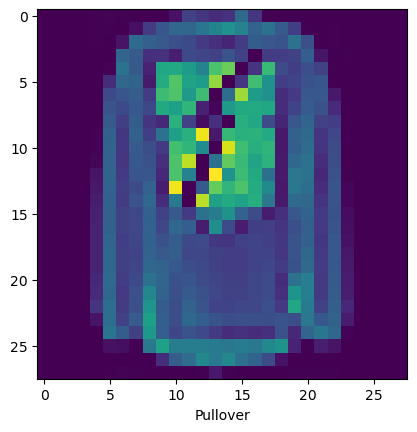

In [10]:
# actual classification of test image
pyplot.figure()
pyplot.imshow(test_images[222].squeeze())
pyplot.xlabel(class_names[test_labels[222]])
pyplot.show()

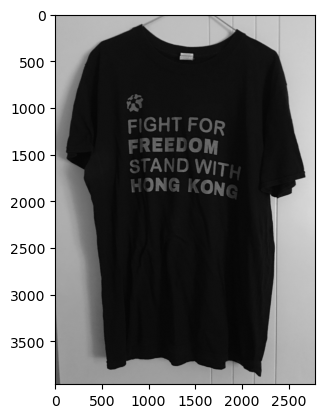

Before preprossing, img.shape =  (3961, 2787)


In [11]:
# Read an external image
img = cv2.imread('/home/jovyan/work/fashion_example01.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.imshow('Example01', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
pyplot.figure()
pyplot.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
pyplot.show()
print("Before preprossing, img.shape = ", img.shape)

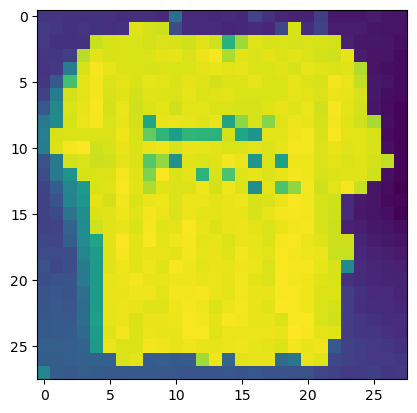

In [12]:
# Resize and negate the image
imgsize = 28
img = cv2.bitwise_not(img)
img = cv2.resize(img, (imgsize, imgsize))
# cv2.imshow('Reduced01', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
pyplot.figure()
pyplot.imshow(img)
pyplot.show()

In [13]:
# Reshape the image for the CNN fashion model
img = tf.expand_dims(img, -1)
img = tf.divide(img, 255)
img = tf.reshape(img, [1, imgsize, imgsize, 1])
print("After preprossing, img.shape = ", img.shape)

After preprossing, img.shape =  (1, 28, 28, 1)


In [14]:
# Predict about the image
yhat = model.predict(asarray(img))
print("yhat = ", yhat)
print('Predicted: class = %s' % class_names[argmax(yhat)])

1/1 [==============================] - 0s 17ms/step
yhat =  [[0.28949863 0.00281732 0.3810035  0.00862427 0.00202302 0.00257731
  0.13891795 0.00078787 0.17128102 0.00246924]]
Predicted: class = Pullover


In [15]:
# save the model
model.save("/home/jovyan/work/cnn_fashion_enhanced_jupyter_model")
print('Model saved as cnn_fashion_enhanced_jupyter_model')

INFO:tensorflow:Assets written to: /home/jovyan/work/cnn_fashion_enhanced_jupyter_model/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/cnn_fashion_enhanced_jupyter_model/assets


Model saved as cnn_fashion_enhanced_jupyter_model
